In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import tensorflow 
import os
import glob
import tqdm

from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline 

In [3]:
alluvial_soil_path = r'C:\Users\vedan\Desktop\crop prediction\Train\Alluvial Soil'
black_soil_path = r'C:\Users\vedan\Desktop\crop prediction\Train\Black Soil'
clay_soil_path = r'C:\Users\vedan\Desktop\crop prediction\Train\Clay Soil'
red_soil_path = r'C:\Users\vedan\Desktop\crop prediction\Train\Red Soil'

# Listing the contents of each directory
alluvial_soil = os.listdir(alluvial_soil_path)
black_soil = os.listdir(black_soil_path)
clay_soil = os.listdir(clay_soil_path)
red_soil = os.listdir(red_soil_path)

In [4]:
dataset_train_dir = r'C:\Users\vedan\Desktop\crop prediction\Train'

# List directories only (each directory represents a label)
labels = [name for name in os.listdir(dataset_train_dir) if os.path.isdir(os.path.join(dataset_train_dir, name))]

print("Labels in the dataset:", labels)

Labels in the dataset: ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']


In [5]:
a, b, c, d = len(alluvial_soil), len(black_soil), len(clay_soil), len(red_soil)
e = a + b + c + d
print("Total images: ", e)

Total images:  1215


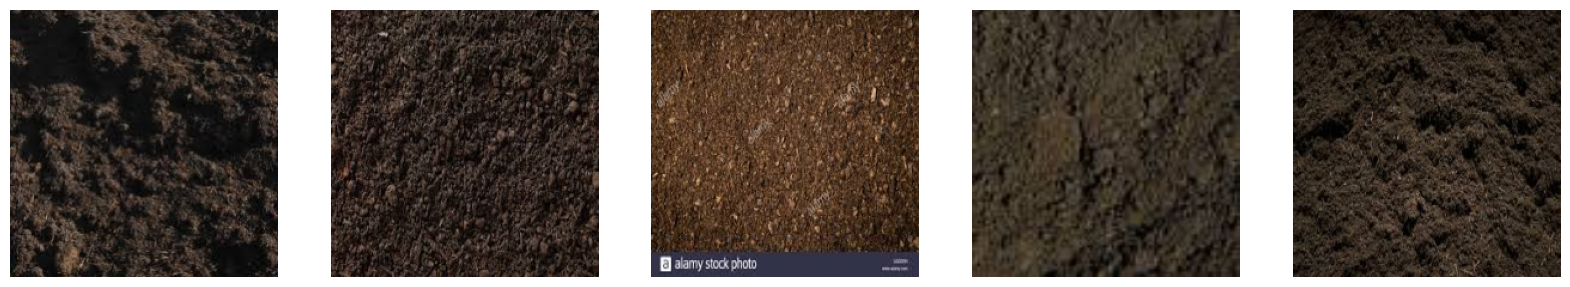

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i in range(0, 5):
    rand = np.random.randint(len(black_soil))
    img_path = os.path.join(black_soil_path, black_soil[rand])
    img = imread(img_path)
    img = resize(img, (224, 224))
    ax[i].imshow(img)
    ax[i].axis('off')

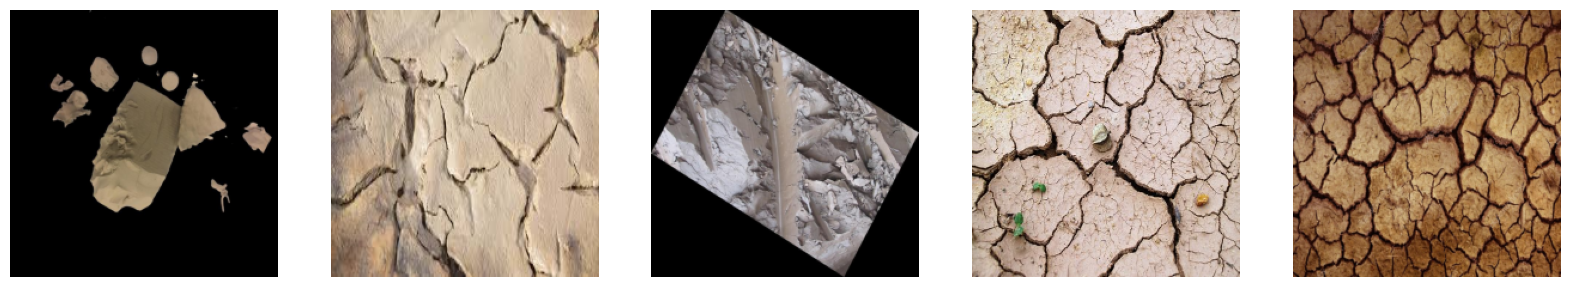

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i in range(0, 5):
    rand = np.random.randint(len(clay_soil))
    img_path = os.path.join(clay_soil_path, clay_soil[rand])
    img = imread(img_path)
    img = resize(img, (224, 224))
    ax[i].imshow(img)
    ax[i].axis('off')

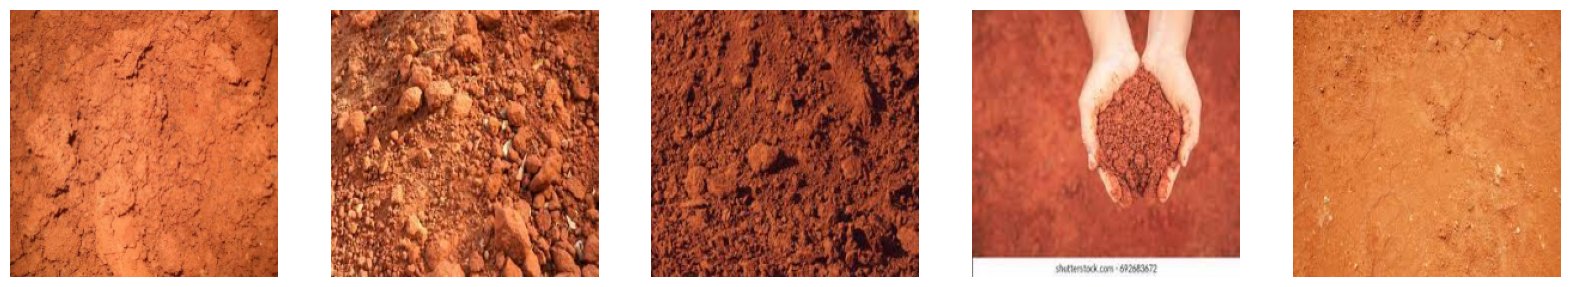

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i in range(0, 5):
    rand = np.random.randint(len(clay_soil))
    img_path = os.path.join(red_soil_path, red_soil[rand])
    img = imread(img_path)
    img = resize(img, (224, 224))
    ax[i].imshow(img)
    ax[i].axis('off')

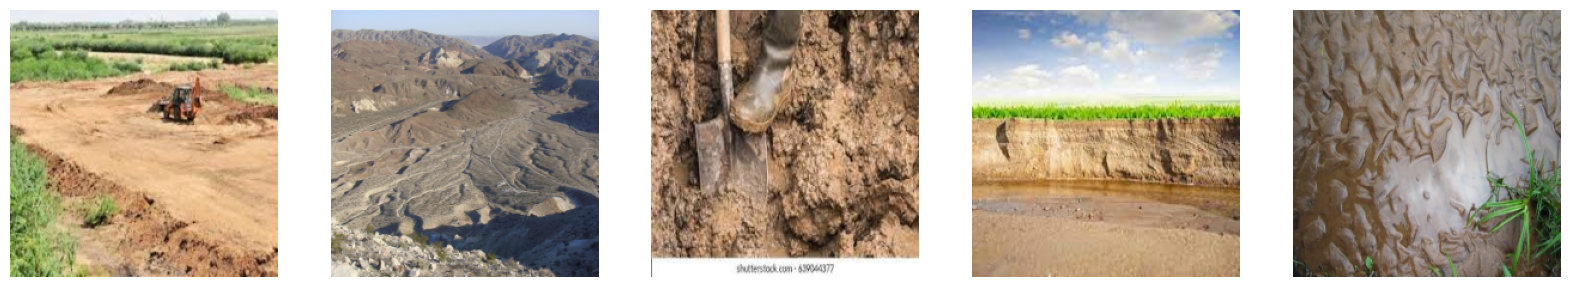

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i in range(0, 5):
    rand = np.random.randint(len(clay_soil))
    img_path = os.path.join(alluvial_soil_path, alluvial_soil[rand])
    img = imread(img_path)
    img = resize(img, (224, 224))
    ax[i].imshow(img)
    ax[i].axis('off')

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest')

test_datagen  = ImageDataGenerator(rescale=1./255)

#image normalization

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    directory=r'C:\Users\vedan\Desktop\crop prediction\Train',  # Updated path
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=100
)

#preparing dataset

Found 1215 images belonging to 4 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    directory=r'C:\Users\vedan\Desktop\crop prediction\Test',  # Updated path
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=100
)


Found 340 images belonging to 4 classes.


In [13]:
model = Sequential()


In [14]:
# Input Layer 
model.add(InputLayer(input_shape = (224,224,3)))


# Layers
model.add(Conv2D(filters = 32,  kernel_size  = (3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,  kernel_size  = (3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.25))


# Flatten()
model.add(Flatten())
#allows connection for dense layer

# Full Connected Layer 
model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Output layer 
model.add(Dense(units = 4, activation = 'softmax'))

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     2

In [16]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [17]:
    filepath = './best_weights.hdf5'

    earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                                mode = 'max' , 
                                patience = 10)

    checkpoint    = ModelCheckpoint(filepath, 
                                    monitor = 'val_accuracy', 
                                    mode='max', 
                                    save_best_only=True, 
                                    verbose = 1)

    learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy',
                                    mode = 'max',
                                    verbose = 1,
                                    factor = 0.1,
                                    min_delta = 1e-5,
                                    patience = 3)

    callback_list = [earlystopping, checkpoint, learning_rate]

In [19]:
model_history = model.fit(train_dataset,
                          validation_data = test_dataset,
                          epochs = 100,
                          verbose = 1,
                          callbacks = callback_list)

Epoch 1/100
 5/13 [==========>...................] - ETA: 26s - loss: 1.1769 - accuracy: 0.6675

KeyboardInterrupt: 

In [118]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_dataset)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


13/13 [==============================] - 13s 988ms/step - loss: 0.2337 - accuracy: 0.9119
Training Accuracy: 91.19%
4/4 [==============================] - 3s 694ms/step - loss: 0.2474 - accuracy: 0.9088
Test Accuracy: 90.88%
